In [1]:
import numpy as np
import os
import pandas as pd
import xarray as xr
import glob

In [34]:
import matplotlib.pyplot as plt

In [2]:
import pyarrow

In [3]:
folder = "/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/"
out_folder = "/home/mlopez/EXEC/TimeMeansModels/"

In [4]:
files = glob.glob(folder+"*rcp45_tn_mean_annual.nc")
#ex: ACCESS1-3_rcp45_tn_mean_annual.nc
files

['/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/ACCESS1-3_rcp45_tn_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/BNU-ESM_rcp45_tn_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/CanESM2_rcp45_tn_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/CMCC-CMS_rcp45_tn_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/GFDL-ESM2M_rcp45_tn_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/HadGEM2-CC_rcp45_tn_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/INM-CM4_rcp45_tn_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/IPSL-CM5A-LR_rcp45_tn_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/IPSL-CM5B-LR_rcp45_tn_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/MPI-ESM-LR_rcp45_tn_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/NorESM1-M_rcp45_tn_mean_annual.nc']

In [5]:
arrays = []
for file in files:
    fname = os.path.basename(file)
    #fbase = os.path.splitext(fname)[0]
    print(fname)
    data = xr.open_dataset(file)
    
    global index
    index = data.indexes['time']
    if index.dtype != "<M8[ns]":
        data['time'] = index.to_datetimeindex()
    arrays.append(data)
    print (data)

ACCESS1-3_rcp45_tn_mean_annual.nc
<xarray.Dataset>
Dimensions:  (lat: 320, lon: 416, time: 151)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1951-01-01 ... 2100-01-01
  * lat      (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon      (lon) float32 -89.04521 -88.96188 -88.87855 ... -54.54659 -54.46326
Data variables:
    tn_mean  (time, lat, lon) float32 ...
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. For internal use only.
BNU-ESM_rcp45_tn_mean_annual.nc


<ipython-input-5-6fda97e0baaf>:11: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  data['time'] = index.to_datetimeindex()
<ipython-input-5-6fda97e0baaf>:11: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  data['time'] = index.to_datetimeindex()


<xarray.Dataset>
Dimensions:  (lat: 320, lon: 416, time: 151)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1951-01-01 ... 2100-01-01
  * lon      (lon) float32 -89.04521 -88.96188 -88.87855 ... -54.54659 -54.46326
  * lat      (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
Data variables:
    tn_mean  (time, lat, lon) float32 ...
Attributes:
    Conventions:     CF-1.5
    title:           BNU-ESM model output prepared for CMIP5 historical
    history:         2012-03-12T06:02:50Z CMOR rewrote data to comply with CF...
    institution:     GCESS,BNU,Beijing,China
    source:          BNU-ESM\n30-day moving window 50-bins quantile mapping w...
    redistribution:  Redistribution prohibited. For internal use only.
CanESM2_rcp45_tn_mean_annual.nc
<xarray.Dataset>
Dimensions:  (lat: 320, lon: 416, time: 151)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1951-01-01 ... 2100-01-01
  * lon      (lon) float32 -89.04521 -88.96188 -88.87855 ... -54.5465

<ipython-input-5-6fda97e0baaf>:11: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, '360_day', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  data['time'] = index.to_datetimeindex()
<ipython-input-5-6fda97e0baaf>:11: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  data['time'] = index.to_datetimeindex()


In [6]:
arrays

[<xarray.Dataset>
 Dimensions:  (lat: 320, lon: 416, time: 151)
 Coordinates:
   * time     (time) datetime64[ns] 1950-01-01 1951-01-01 ... 2100-01-01
   * lat      (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
   * lon      (lon) float32 -89.04521 -88.96188 -88.87855 ... -54.54659 -54.46326
 Data variables:
     tn_mean  (time, lat, lon) float32 ...
 Attributes:
     Conventions:     CF-1.5
     title:           ACCESS1-3 model output prepared for CMIP5 historical
     history:         CMIP5 compliant file produced from raw ACCESS model outp...
     institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
     source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
     redistribution:  Redistribution prohibited. For internal use only.,
 <xarray.Dataset>
 Dimensions:  (lat: 320, lon: 416, time: 151)
 Coordinates:
   * time     (time) datetime64[ns] 1950-01-01 1951-01-01 ... 2100-01-01
   * lon      (lon) float32 -89.04521 -88.9

In [7]:
big_data = xr.concat(arrays, "model")

In [8]:
9*150

1350

In [9]:
%time big_data.isel(time=[0]).quantile([0.1,0.5,0.9], 'model')

/home/mlopez/EXEC/anaconda3/envs/python37-2/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1390: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


CPU times: user 12.6 s, sys: 227 ms, total: 12.9 s
Wall time: 11.5 s


<xarray.Dataset>
Dimensions:   (lat: 320, lon: 416, quantile: 3, time: 1)
Coordinates:
  * lat       (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon       (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time      (time) datetime64[ns] 1950-01-01
  * quantile  (quantile) float64 0.1 0.5 0.9
Data variables:
    tn_mean   (quantile, time, lat, lon) float64 253.7 253.8 253.8 ... nan nan

In [12]:
#%time quantiles = big_data.quantile([0.1,0.5,0.9], "model")

In [13]:
#quantiles

In [14]:
df = big_data.to_dataframe().dropna()
df = df.reset_index()
df

,lat,lon,model,time,tn_mean
0,66.623306,-89.045212,0,1950-01-01,255.607208
1,66.623306,-89.045212,0,1951-01-01,255.747223
2,66.623306,-89.045212,0,1952-01-01,255.518768
3,66.623306,-89.045212,0,1953-01-01,255.136093
4,66.623306,-89.045212,0,1954-01-01,256.485352
...,...,...,...,...,...
126578161,40.041039,-74.045807,10,2096-01-01,282.007874
126578162,40.041039,-74.045807,10,2097-01-01,281.860657
126578163,40.041039,-74.045807,10,2098-01-01,281.271240
126578164,40.041039,-74.045807,10,2099-01-01,282.671326


In [16]:
df.to_feather(out_folder + "df_tn_annual_11models.feather")

In [20]:
df2 = df.groupby("time").mean()
df2

,lat,lon,model,tn_mean
time,,,,
1950-01-01,52.173106,-73.902198,5,266.995270
1951-01-01,52.173106,-73.902198,5,266.463562
1952-01-01,52.173106,-73.902198,5,266.741119
1953-01-01,52.173106,-73.902198,5,266.792725
1954-01-01,52.173106,-73.902198,5,267.304810
...,...,...,...,...
2096-01-01,52.173106,-73.902198,5,271.427307
2097-01-01,52.173106,-73.902198,5,271.471710
2098-01-01,52.173106,-73.902198,5,271.559937


In [42]:
dfm = df.groupby(["time", "model"]).tn_mean.mean()

In [43]:
dfm

time        model
1950-01-01  0        266.960144
            1        266.045502
            2        266.458313
            3        266.516937
            4        267.001587
                        ...    
2100-01-01  6        269.040924
            7        271.018799
            8        269.972870
            9        271.273254
            10       271.527740
Name: tn_mean, Length: 1661, dtype: float32

In [61]:
dfq = dfm.reset_index().groupby("time").quantile([0.1,0.5,0.9]) - 273.15
def quantiles(q):
    return dfm.reset_index().groupby("time").quantile(q).tn_mean

In [67]:
dfq1 = dfq.query("ilevel_1==0.1")

dfq9 = dfq.query("ilevel_1==0.9")

dfq5 = dfq.query("ilevel_1==0.5").reset_index()

In [68]:
dfq5

,time,level_1,model,tn_mean
0,1950-01-01,0.5,-268.15,-6.199072
1,1951-01-01,0.5,-268.15,-6.695685
2,1952-01-01,0.5,-268.15,-6.330511
3,1953-01-01,0.5,-268.15,-6.384497
4,1954-01-01,0.5,-268.15,-5.875739
...,...,...,...,...
146,2096-01-01,0.5,-268.15,-1.864325
147,2097-01-01,0.5,-268.15,-1.737738
148,2098-01-01,0.5,-268.15,-1.353827
149,2099-01-01,0.5,-268.15,-1.460608


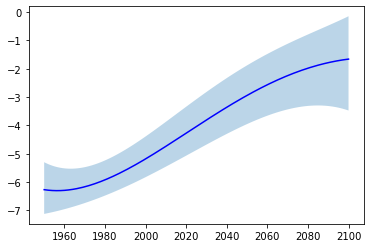

In [81]:
rp5 = polysmooth(years,dfq5.tn_mean,4)
plt.plot(years, rp5, markersize='10', color='blue')
plt.fill_between(years, polysmooth(years, dfq1.tn_mean,4), polysmooth(years, dfq9.tn_mean,4), alpha=0.3)

In [69]:
rp5 = polysmooth(years,dfq5,4)
plt.errorbar(years, rp5, yerr=polysmooth(years,abs(T-rp5),4), markersize='10', ecolor='blue',capsize=4, elinewidth=2)

TypeError: unsupported operand type(s) for +: 'Timestamp' and 'float'

In [23]:
df2.reset_index().to_feather(out_folder + "df2_tn_annual_11models.feather")

In [24]:
TnMeanC = df2
TnMeanC["tn_meanC"] = TnMeanC["tn_mean"] - 273.15
TnMeanC

,lat,lon,model,tn_mean,tn_meanC
time,,,,,
1950-01-01,52.173106,-73.902198,5,266.995270,-6.154724
1951-01-01,52.173106,-73.902198,5,266.463562,-6.686432
1952-01-01,52.173106,-73.902198,5,266.741119,-6.408875
1953-01-01,52.173106,-73.902198,5,266.792725,-6.357269
1954-01-01,52.173106,-73.902198,5,267.304810,-5.845184
...,...,...,...,...,...
2096-01-01,52.173106,-73.902198,5,271.427307,-1.722687
2097-01-01,52.173106,-73.902198,5,271.471710,-1.678284
2098-01-01,52.173106,-73.902198,5,271.559937,-1.590057


In [27]:
TnMeanC.reset_index().time.dt.year

0      1950
1      1951
2      1952
3      1953
4      1954
       ... 
146    2096
147    2097
148    2098
149    2099
150    2100
Name: time, Length: 151, dtype: int64

In [28]:
def polysmooth(years, y, degree):
    coef = np.polyfit(years, y, degree)
    return np.polyval(coef,years)

In [36]:
T = TnMeanC.tn_meanC
years = TnMeanC.reset_index().time.dt.year
smtemp = polysmooth(years,T,4)

plt.errorbar(years, smtemp, yerr=polysmooth(years,abs(T-smtemp),4), markersize='10', ecolor='blue',capsize=4, elinewidth=2)